In [1]:
import tensorflow as tf

2023-11-21 19:36:55.276377: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-11-21 19:36:55.276404: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-11-21 19:36:55.277369: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-11-21 19:36:55.372784: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-11-21 19:36:56.434598: W tensorflow/compiler/

In [2]:
tf.config.list_physical_devices("GPU")

2023-11-21 19:37:05.927249: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:894] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-11-21 19:37:06.097117: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:894] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-11-21 19:37:06.097293: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:894] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysf

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [3]:
import cv2
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.applications.vgg16 import preprocess_input, decode_predictions
import random
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

In [4]:
import os
path = "../../dl_project/light_on/imgs/"
os.listdir(path)

['lightOFF.80.jpg',
 'lightON.34.jpg',
 'lightOFF.83.jpg',
 'lightOFF.560.jpeg',
 'lightOFF.42.jpg',
 'lightOFF.56.jpg',
 'lightOFF.101.jpg',
 'lightON.52.jpg',
 'lightOFF.85.jpg',
 'lightOFF.99.jpg',
 'lightON.176.jpg',
 'lightON.102.jpg',
 'lightON.169.jpg',
 'lightON.207.jpg',
 'lightON.38.jpg',
 'lightON.42.jpg',
 'lightOFF.103.jpg',
 'lightON.54.jpg',
 'lightOFF.52.jpg',
 'lightOFF.7.jpg',
 'lightOFF.89.jpg',
 'lightON.160.jpg',
 'lightON.83.jpg',
 'lightON.30.jpg',
 'lightON.10.jpg',
 'lightON.279.jpg',
 'lightON.55.jpg',
 'lightON.25.jpg',
 'lightOFF.1.jpg',
 'lightON.165.jpg',
 'lightOFF.82.jpg',
 'lightOFF.8.jpg',
 'lightOFF.15.jpg',
 'lightOFF.108.jpg',
 'lightON.72.jpg',
 'lightON.87.jpg',
 'lightOFF.79.jpg',
 'lightOFF.13.jpg',
 'lightON.77.jpg',
 'lightON.155.jpg',
 'lightON.106.jpg',
 'lightON.355.jpg',
 'lightON.321.jpg',
 'lightOFF.110.jpg',
 'lightOFF.5.jpg',
 'lightOFF.77.jpg',
 'lightON.190.jpg',
 'lightOFF.74.jpg',
 'lightON.111.jpg',
 'lightOFF.55.jpg',
 'lightON.2

In [5]:
light_names = os.listdir(path)
on_off_labels = [each.split('.')[0] for each in light_names]
on_off_file_id =[each.split('.')[1] for each in light_names]

In [6]:
len(light_names)

389

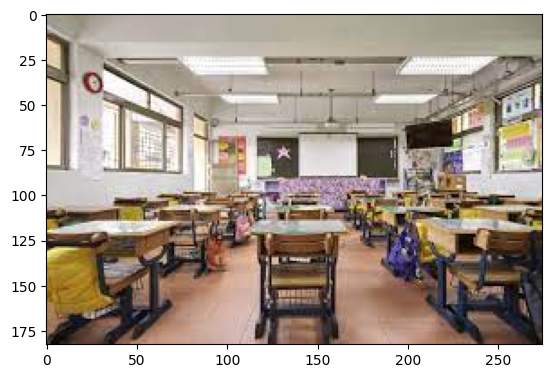

In [7]:
# import random
# import matplotlib.pyplot as plt
# import matplotlib.image as mpimg
# %matplotlib inline

sample = random.choice(light_names)
image = mpimg.imread(path + sample)
plt.imshow(image)
plt.show()

In [8]:
sample = random.choice(light_names)
image = mpimg.imread(path+ sample)
image.shape

(168, 300, 3)

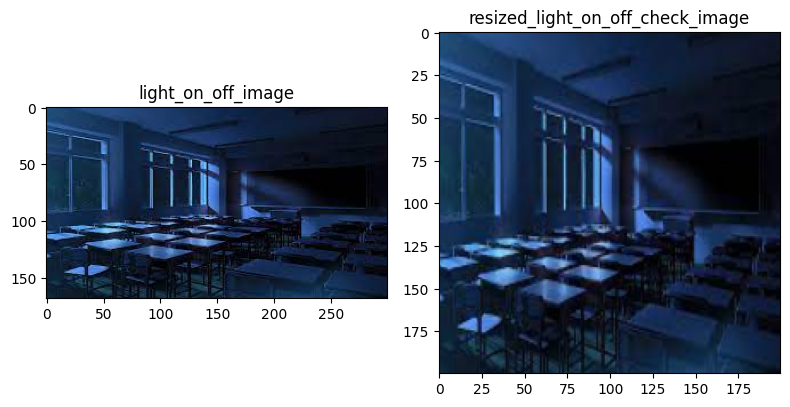

In [9]:
from skimage.transform import resize
resized = resize(image, (200, 200, 3)) #300, 300 크기로 변경

fig, axes = plt.subplots(1, 2, figsize =(8, 4))
ax = axes.ravel()

ax[0].imshow(image, cmap = plt.cm.gray)
ax[0].set_title("light_on_off_image")
ax[1].imshow(resized, cmap =plt.cm.gray)
ax[1].set_title("resized_light_on_off_check_image")

fig.tight_layout()
plt.show()

In [10]:
from tqdm.notebook import tqdm
from skimage.color import rgb2gray
import numpy as np

images = []
bar_total = tqdm(light_names)
for file in bar_total:
    image = mpimg.imread(path+file)
    images.append(resize(image, (200, 200, 3)))

images = np.array(images)

  0%|          | 0/389 [00:00<?, ?it/s]

In [11]:
images.shape, light_names[:5]

((389, 200, 200, 3),
 ['lightOFF.80.jpg',
  'lightON.34.jpg',
  'lightOFF.83.jpg',
  'lightOFF.560.jpeg',
  'lightOFF.42.jpg'])

In [12]:
images[:3]

array([[[[0.03137255, 0.03921569, 0.08627451],
         [0.03137255, 0.03921569, 0.08627451],
         [0.03137255, 0.03921569, 0.08627451],
         ...,
         [0.31455324, 0.48023919, 0.86160976],
         [0.27941439, 0.44019608, 0.82352875],
         [0.26764969, 0.41667061, 0.7970631 ]],

        [[0.03137255, 0.03921569, 0.08627451],
         [0.03137255, 0.03921569, 0.08627451],
         [0.03137255, 0.03921569, 0.08627451],
         ...,
         [0.31321946, 0.47890541, 0.86027598],
         [0.27941439, 0.44019608, 0.82352875],
         [0.26764969, 0.41667061, 0.7970631 ]],

        [[0.03137255, 0.03921569, 0.08627451],
         [0.03137255, 0.03921569, 0.08627451],
         [0.03137255, 0.03921569, 0.08627451],
         ...,
         [0.31157185, 0.4790223 , 0.85451092],
         [0.27941439, 0.44196039, 0.82000013],
         [0.26764969, 0.41667081, 0.7970627 ]],

        ...,

        [[0.06450869, 0.0880381 , 0.18215575],
         [0.0615685 , 0.08509791, 0.17921555]

In [13]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
encoder.fit(on_off_labels)
light_on_off_labels_encoded = encoder.transform(on_off_labels)
light_on_off_labels_encoded[:3], encoder.classes_

(array([2, 3, 2]),
 array(['5f204d0a9531e', 'NISI20200903_0016639788_web', 'lightOFF',
        'lightON', 'marriott-s-surfwatch',
        'tiki-bg-apartment-livingroom-night-lights-off', 'walsh-750x469'],
       dtype='<U45'))

In [17]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train , y_test =\
                train_test_split(images, light_on_off_labels_encoded, test_size =0.2,
                                 random_state = 13, stratify  = light_on_off_labels_encoded)
X_train.shape, X_test.shape

ValueError: The least populated class in y has only 1 member, which is too few. The minimum number of groups for any class cannot be less than 2.